# Hubble Orbit Altitude History

### Robert Cameron, September 2019

In [1]:
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime as dt
import re
%matplotlib notebook
from IPython.core.display import Image 

In [2]:
path = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/Hubble-TLE/"
# input file = history listing of TLE orbit parameter records for Fermi
#infile = path+"yy-doy-p.txt"  # obsolete
infile = path + "sort-y-doy-mm.txt2"

# read the ASCII data file

cols = ['y','doy','motion','period']
sdf = pd.read_csv(infile,names=cols, delim_whitespace=True)
y = sdf['y']
doy = sdf['doy']
m = sdf['motion']
p = sdf['period']
y.min(),y.idxmin(),y.max(),y.idxmax(),p.min(),p.idxmin(),p.max(),p.idxmax()

(1990, 0, 2019, 12868, 5724.6293049999995, 13307, 5821.6465530000005, 0)

In [3]:
ylen = y % 4
ylen.where(ylen == 0, other=365, inplace=True)
ylen.where(ylen > 0, other=366, inplace=True)
ylen

fy = y + doy/ylen
#ylen, fy, p

In [4]:
# calculate orbit altitude from orbit Period (Wertz 1978)

pi = 3.14159265359
GM = 398600.44  # km^3 s^-2 (Wertz 1978)
semimajor = (GM*(p/2/pi)**2.0)**0.333333333333   # km
alt = semimajor - 6378    # km
#semi = round(semimajor,4)
#semimajor, alt

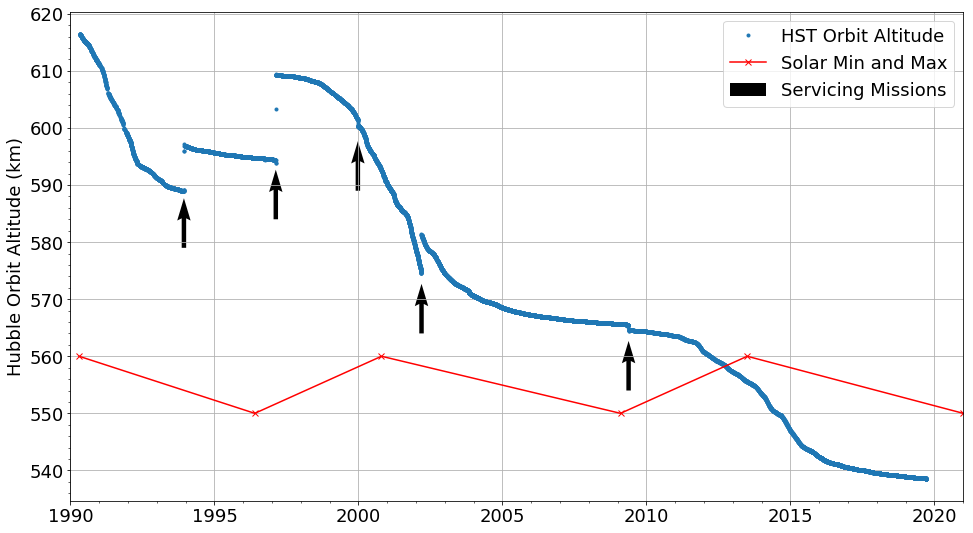

In [15]:
# plot the Hubble orbit altitude
plt.figure(figsize = [16, 9])
plt.rc('font', size = 18)
plt.ylabel('Hubble Orbit Altitude (km)')
plt.xlim(1990,2021)
#plt.ylim(538,540)
plt.tick_params(axis = 'both', which = 'major')
plt.tick_params(axis = 'both', which = 'minor')
plt.minorticks_on()
plt.grid(which='major')
plt.ticklabel_format(useOffset=False)
plt.plot(fy, alt, '.', lw=3,label = 'HST Orbit Altitude')
plt.plot([1990.3,1996.4,2000.8,2009.1,2013.5,2021],[560,550,560,550,560,550],'-x',color='r',label='Solar Min and Max')
plt.quiver([1993.94,1997.13,1999.98,2002.19,2009.38],[579,584,589,564,554],[0,0,0,0,0],[5,5,5,5,5],width=.005,label='Servicing Missions')
plt.legend()

plt.savefig(path+"alt2019.png")

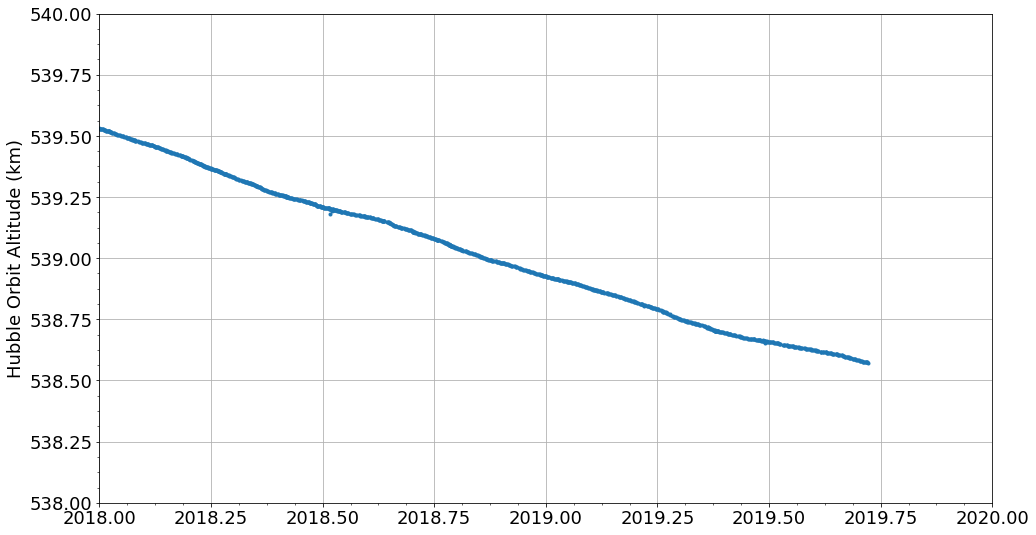

In [16]:
# plot the Hubble orbit altitude
plt.figure(figsize = [16, 9])
plt.rc('font', size = 18)
plt.ylabel('Hubble Orbit Altitude (km)')
plt.xlim(2018,2020)
plt.ylim(538,540)
plt.tick_params(axis = 'both', which = 'major')
plt.tick_params(axis = 'both', which = 'minor')
plt.minorticks_on()
plt.grid(which='major')
plt.ticklabel_format(useOffset=False)
plt.plot(fy, alt, '.', lw=3,label = 'HST Orbit Altitude')
#plt.plot([1990.3,1996.4,2000.8,2009.1,2013.5,2021],[560,550,560,550,560,550],'-x',color='r',label='Solar Min and Max')
#plt.quiver([1993.94,1997.13,1999.98,2002.19,2009.38],[579,584,589,564,554],[0,0,0,0,0],[5,5,5,5,5],width=.005,label='Servicing Missions')
#plt.legend()

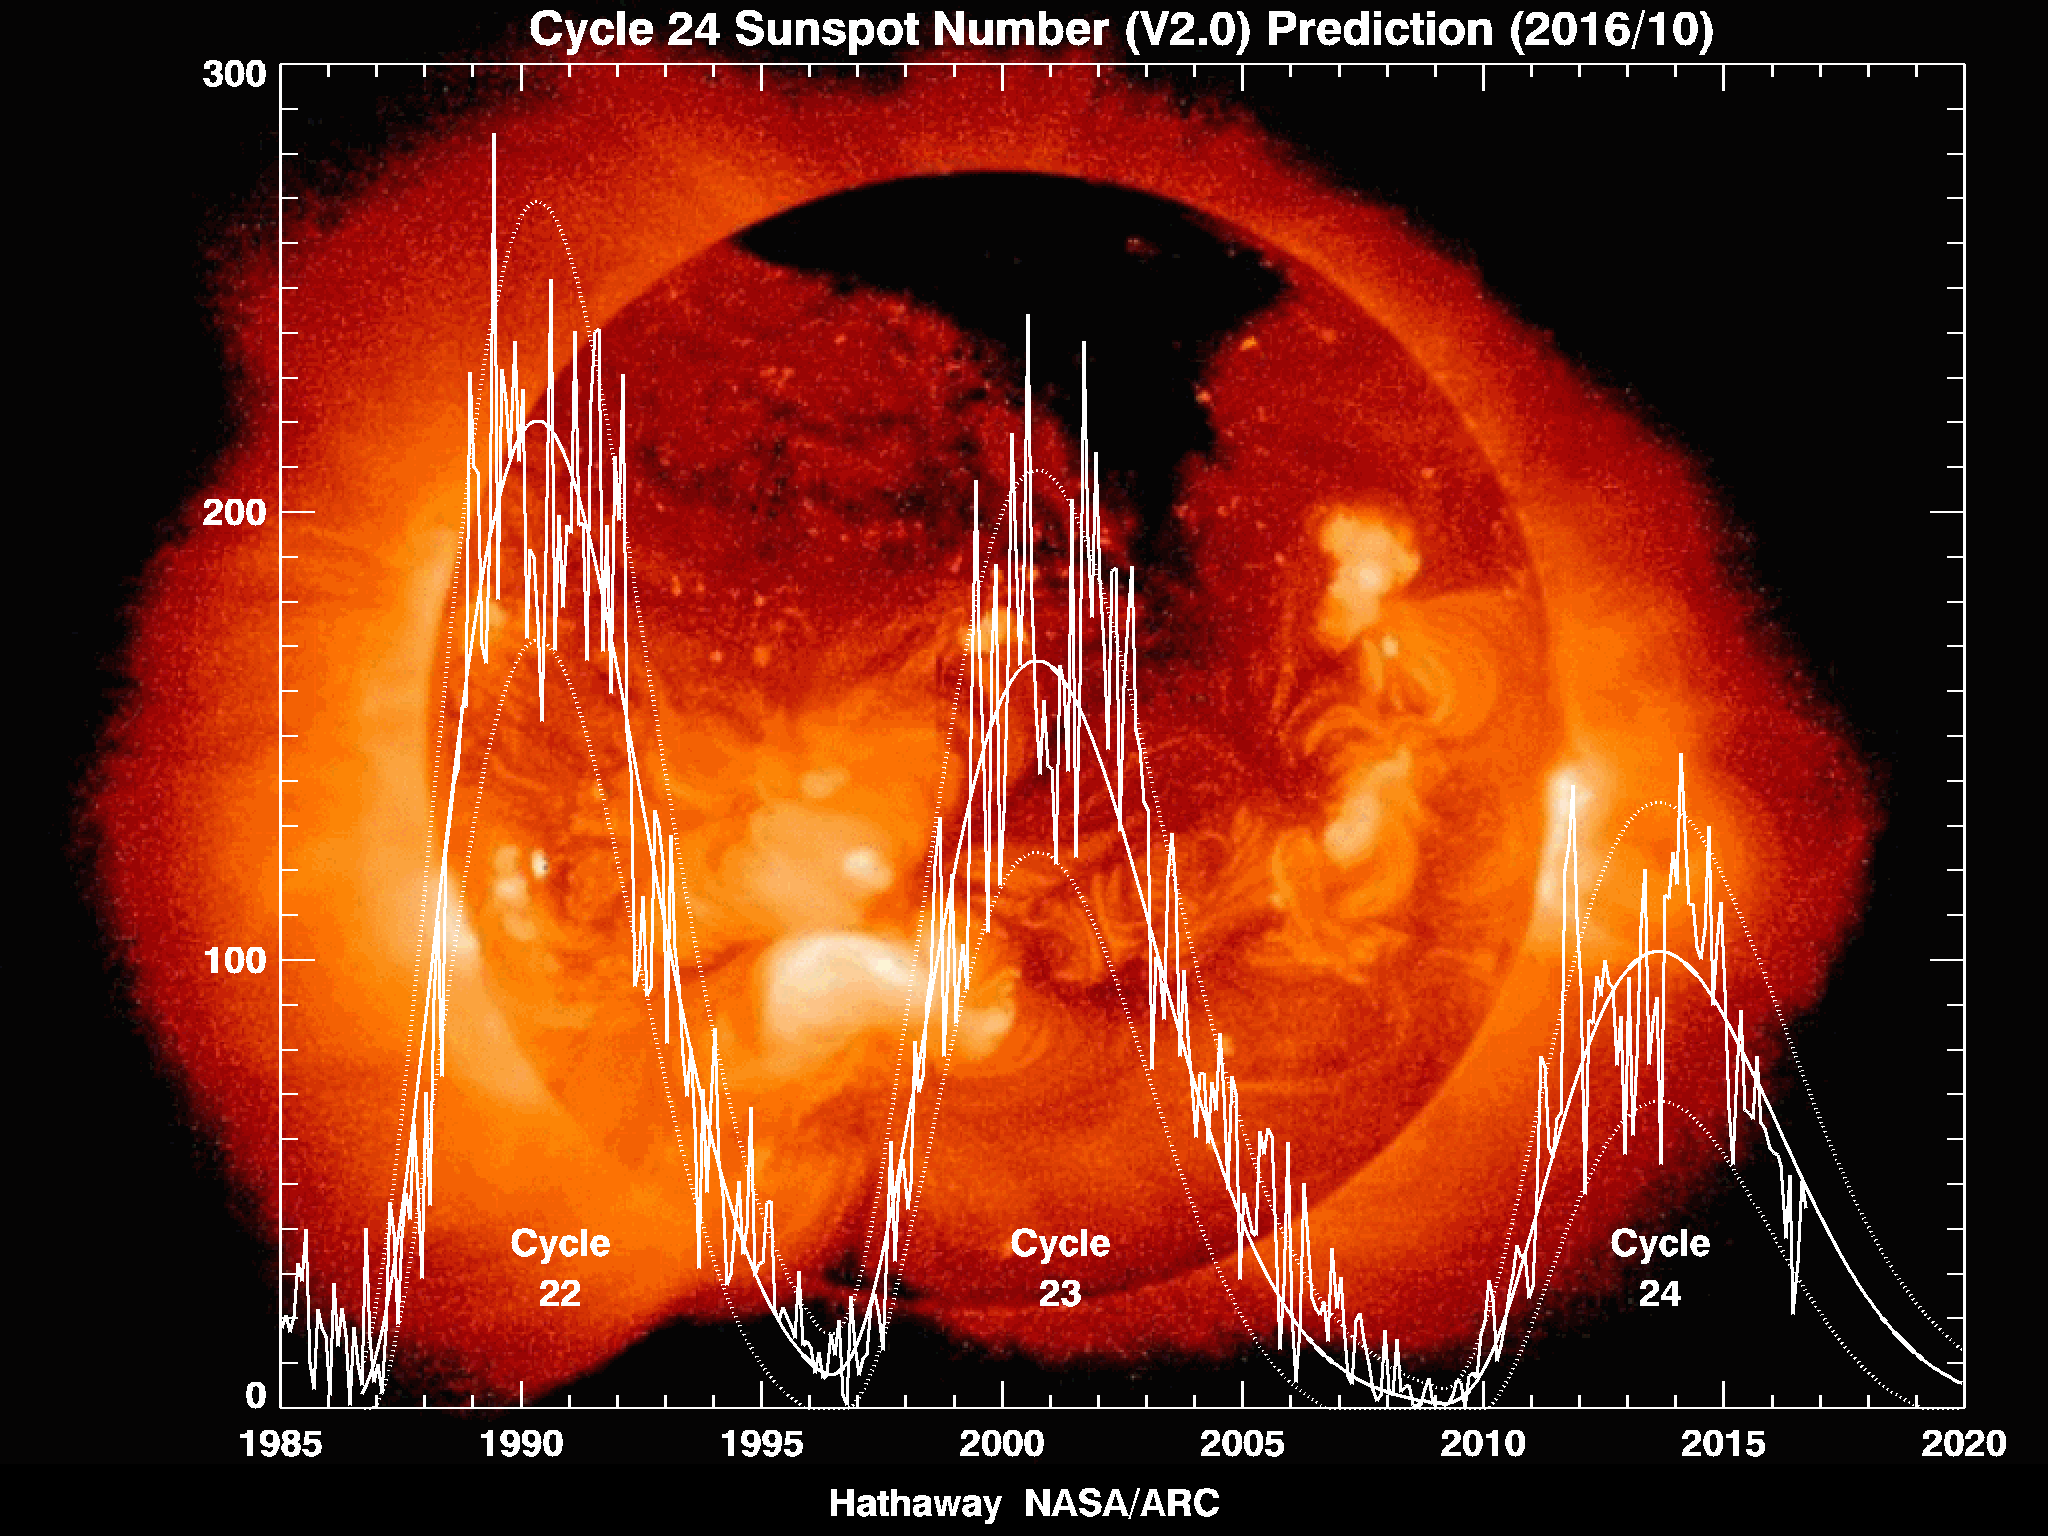

In [6]:
Image(path+'Solar_Cycles-3.gif')

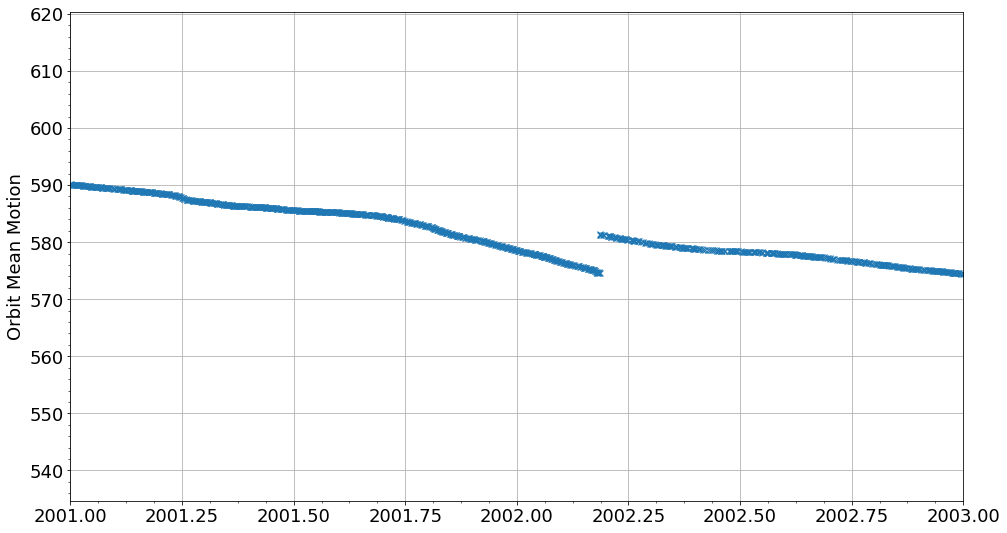

In [7]:
# plot the Hubble orbit mean motion
plt.figure(figsize = [16, 9])
plt.rc('font', size = 18)
plt.ylabel('Orbit Mean Motion')
plt.xlim(2001,2003)
#plt.ylim(320,350)
plt.tick_params(axis = 'both', which = 'major')
plt.tick_params(axis = 'both', which = 'minor')
plt.minorticks_on()
plt.grid(which='major')
plt.ticklabel_format(useOffset=False)
plt.plot(fy, alt, 'x', lw=3)

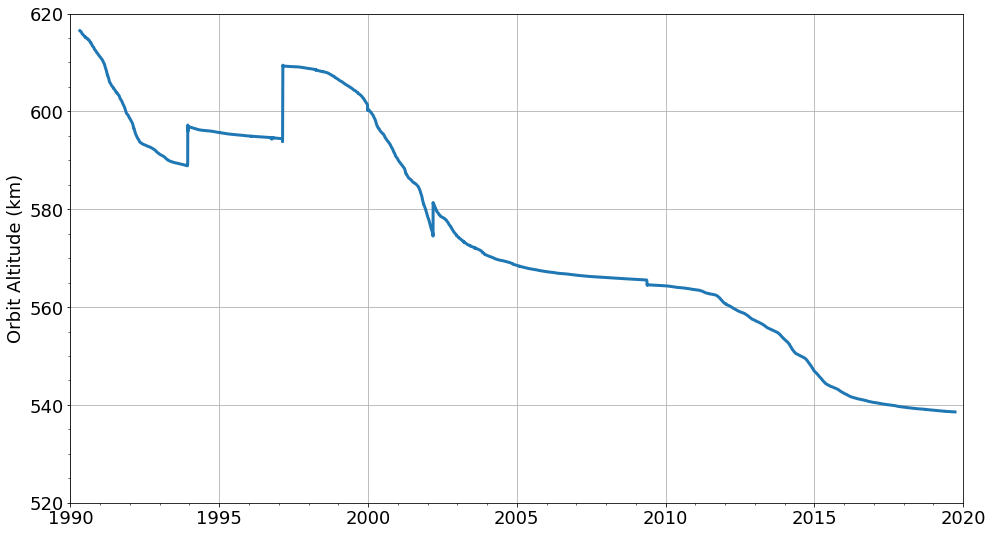

In [14]:
# plot the Hubble orbit altitude
plt.figure(figsize = [16, 9])
plt.rc('font', size = 18)
plt.ylabel('Orbit Altitude (km)')
plt.ylim([520,620])
plt.xlim([1990,2020])
plt.tick_params(axis = 'both', which = 'major')
plt.tick_params(axis = 'both', which = 'minor')
plt.minorticks_on()
plt.grid(which='major')
plt.ticklabel_format(useOffset=False)
plt.plot(fy, alt, '', lw=3)